/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


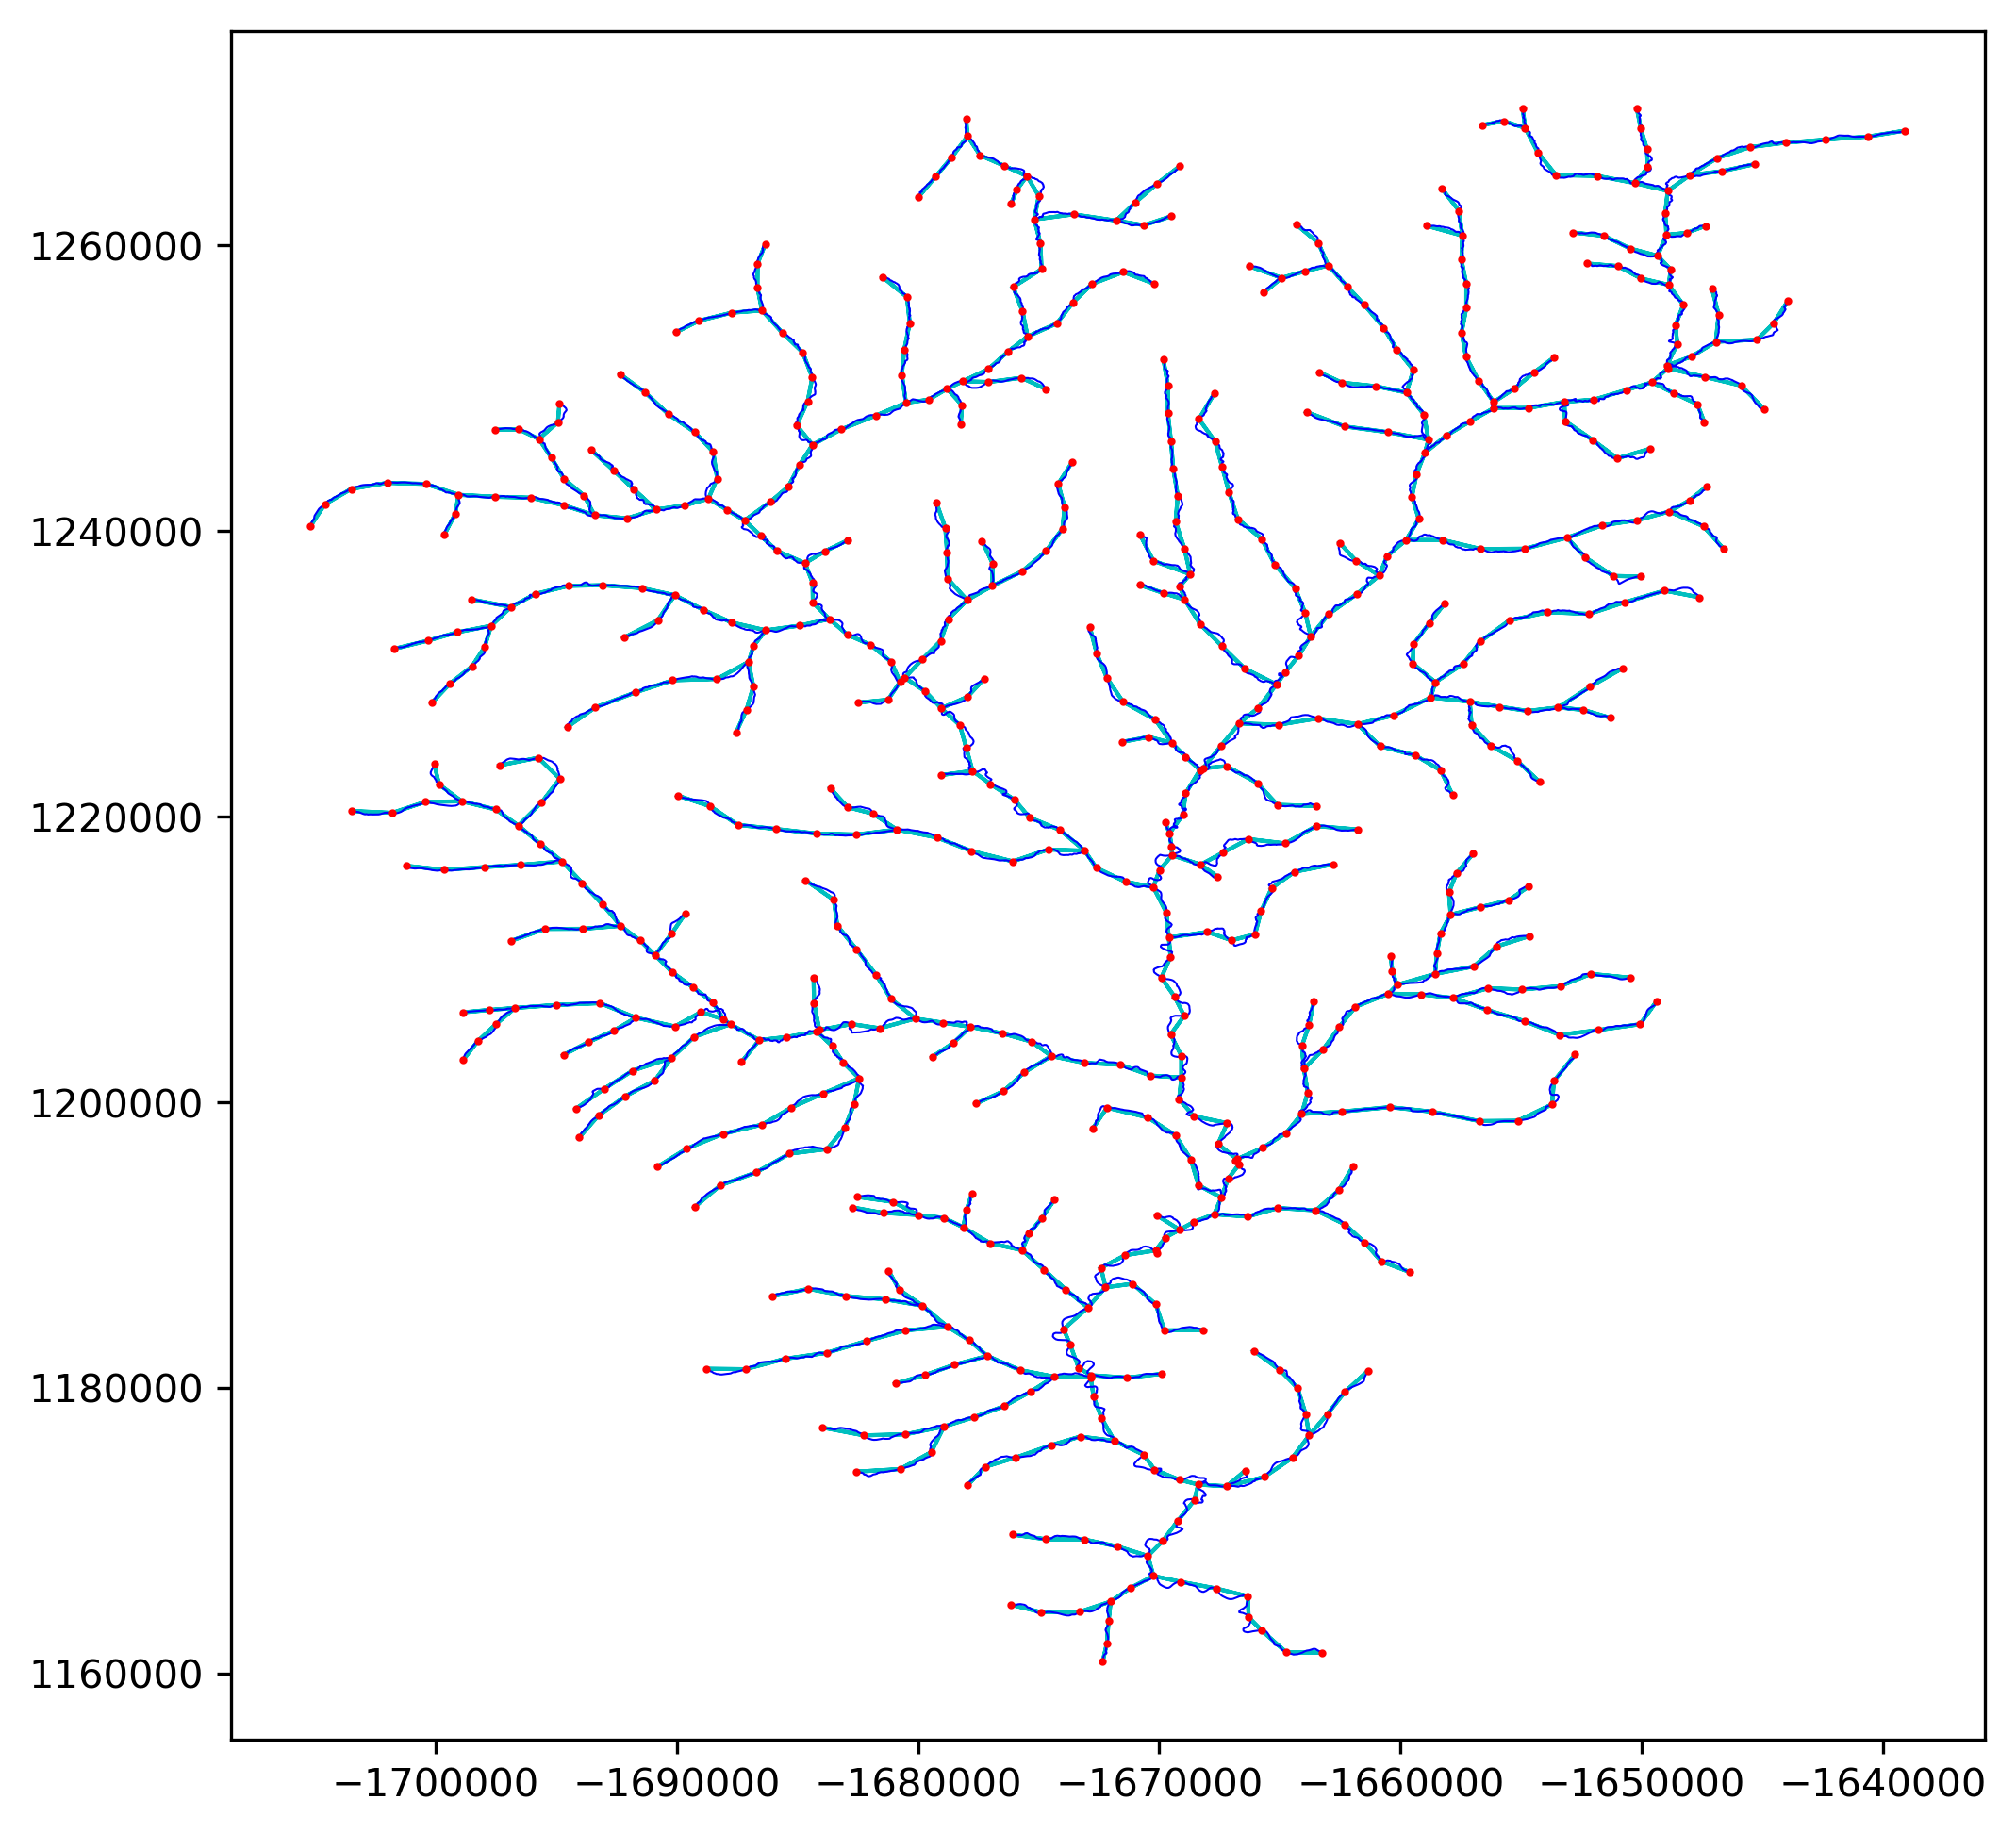

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
    
from landlab.io import read_shapefile

%matplotlib inline  
DATA_DIR = './data/'


file = os.path.join(DATA_DIR, 'methow', 'Methow_Network.shp')
grid = read_shapefile(file)


# for plotting and testing
x_of_polylines = grid['link']['x_of_polyline']
y_of_polylines = grid['link']['y_of_polyline']

segments = []

for i in range(len(x_of_polylines)):
    x = np.array(x_of_polylines[i])
    y = np.array(y_of_polylines[i])
    segment = np.array((x, y)).T
    segments.append(segment)


from landlab.plot import graph
fig, ax = plt.subplots(figsize=(8,8), dpi=300)


graph.plot_links(grid, color='c', linestyle='solid', with_id=False,
               as_arrow=False, linewidth=1)
graph.plot_nodes(grid, color='r', with_id=False, markersize=1)

line_segments = LineCollection(segments, color='b', linewidth=0.5)
ax.add_collection(line_segments)

fig.show()


In [2]:
grid

<xarray.Dataset>
Dimensions:             (Two: 2, link: 720, node: 721)
Coordinates:
  * node                (node) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 ...
Dimensions without coordinates: Two, link
Data variables:
    mesh                <U1 'a'
    y_of_node           (node) float64 1.161e+06 1.161e+06 1.161e+06 ...
    x_of_node           (node) float64 -1.672e+06 -1.663e+06 -1.665e+06 ...
    nodes_at_link       (link, Two) int64 0 3 2 1 2 4 3 5 4 6 7 8 5 10 9 7 6 ...
    GridID@link         (link) int64 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 ...
    Length_m@link       (link) float64 1.362e+03 1.421e+03 1.573e+03 ...
    ToLink@link         (link) object 3.0 7.0 2.0 5.0 6.0 7.0 8.0 9.0 14.0 ...
    usarea_km2@link     (link) float64 10.51 61.97 14.08 19.97 34.79 61.97 ...
    uselev_m@link       (link) float64 954.1 585.6 739.2 792.6 670.3 564.1 ...
    dselev_m@link       (link) float64 739.2 461.1 585.6 670.3 564.1 461.1 ...
    Slope@link          (link) float64 0.1578 0